# **Logistic Regression on Health Insurance Lead  Prediction**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section41)
  - **4.2** [**Data Statistics**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)
  - **5.2** [**Identification & Handling of Missing Data**](#Section52)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>

**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>
  - **7.1** [**Feature Selection**](#Section71)<br>
  - **7.2** [**Post Profiling Report**](#Section72)<br>
  - **7.3** [**Encoding the Categorical Data**](#Section73)<br>
  - **7.4** [**Data Preparation**](#Section74)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Logistic Regression/Decision Tree - Baseline Model**](#Section81)<br>
  - **8.2** [**Using Trained Model for Prediction**](#Section82)<br>
  - **8.3** [**Logistic Regression/Decision Tree - Model Evaluation**](#Section83)<br>

**9.** [**Conclusion**](#Section9)<br>



<a id=section1></a>

---
<a name = Section1></a>
# **1. Introduction**
---
- LIA is a leading General Insurance Company.
- LIA has introduced over 200 types of insurance including for life, health, and accidents
- The company currently operates in 15 countries, including 10 in Asia. Its customer base has grown from two million in 2008 to more than 40 million today, and date, it has paid more than $20 million in claims.
- LIA wishes to cross-sell health insurance to existing customers who may or may not hold insurance policies with the company.
- The company recommends health insurance to its customers based on their profile once these customers land on the website.



---
<a name = Section2></a>
# **2. Problem Statement**
---
- The current process is a manual prediction of whether customers will be interested in recommended policy. This is very tedious and time-consuming as it needs to be repeated every time a new customer we contact so need to automate the process of predicting whether the customer is interested in recommended policy or not using the information provided by the customer.
-  So need to build a classification model using the dataset on cusotmer response.

<br> 
<center>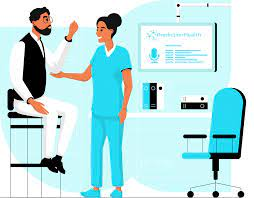</center>



---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
# !pip install -q datascience                   # Package that is required by pandas profiling
# !pip install -q pandas-profiling              # Library to generate basic statistics about data

     |████████████████████████████████| 69 kB 3.8 MB/s 


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
# !pip install -q --upgrade pandas-profiling

     |████████████████████████████████| 266kB 1.7MB/s 
     |████████████████████████████████| 71kB 4.0MB/s 
     |████████████████████████████████| 71kB 4.3MB/s 
     |████████████████████████████████| 3.1MB 5.2MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 604kB 18.8MB/s 
     |████████████████████████████████| 296kB 17.0MB/s 


<a name = Section33></a>
### **3.3 Importing Libraries**

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix, classification_report # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
from sklearn.ensemble import RandomForestClassifier                 # To create the RandomForest Model
from sklearn.tree import DecisionTreeClassifier                     # to create a DecisionTreeclassifier

#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

<center>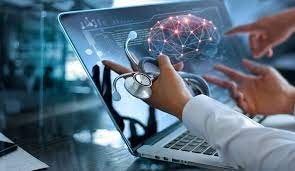</center>

- The train set contains 38000 rows and 14 columns and The last column response is the target variable.
- The test set contains 12882 rows and 13 columns and The test set doesn’t contain the Response column.

| Column Name:						| Description:
| -----------------------			| :--------------------------------------     
| Id								| Customer Id
| City_Code							| Customer’s City Code
| Region_Code						| Customer’s Region Code
| Accomodation_Type					| Type of Accomodation
| Reco_Insurance_Type				| Recommended Insurance Type(i.e. Joint, Single)
| Upper_Age							| Upper Age of customer
| Lower_Age							| Lower age of customer
| Is_Spouse							| Customer’s relation(In case of joint policy)
| Health Indicator					| Current Health Indicator Category
| Holding_Policy_Duration			| Current Holding policy duration
| Reco_Policy_Cat					| Recommended Policy Category
| Holding_Policy_Type				| Current Holding Policy Type
| Reco_Policy_Premium				| Recommended Policy Premium Price
| Response							| Response of Customer

In [2]:
# Importing data using pd.read_csv
health_train = pd.read_csv("train_data.csv")     
health_test = pd.read_csv("test_data.csv")
health_train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0


In [3]:
# make copy of train & test
train_original = health_train.copy()
test_original = health_test.copy()

<a name = Section41></a>
### **4.1 Data Information**

- In this section we will see the **information about the types of features**.

In [4]:
print("Shape of our health train data is :", health_train.shape)
print("Shape of our health test data is :", health_test.shape)

Shape of our health train data is : (38000, 14)
Shape of our health test data is : (12882, 13)


- Shape of our health train data is : (38000, 14)
- Shape of our health test data is : (12882, 13)

In [5]:
health_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       38000 non-null  int64  
 1   City_Code                38000 non-null  object 
 2   Region_Code              38000 non-null  int64  
 3   Accomodation_Type        38000 non-null  object 
 4   Reco_Insurance_Type      38000 non-null  object 
 5   Upper_Age                38000 non-null  int64  
 6   Lower_Age                38000 non-null  int64  
 7   Is_Spouse                38000 non-null  object 
 8   Health Indicator         29280 non-null  object 
 9   Holding_Policy_Duration  22919 non-null  object 
 10  Holding_Policy_Type      22919 non-null  float64
 11  Reco_Policy_Cat          38000 non-null  int64  
 12  Reco_Policy_Premium      38000 non-null  float64
 13  Response                 38000 non-null  int64  
dtypes: float64(2), int64(6

In [6]:
health_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12882 entries, 0 to 12881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       12882 non-null  int64  
 1   City_Code                12882 non-null  object 
 2   Region_Code              12882 non-null  int64  
 3   Accomodation_Type        12882 non-null  object 
 4   Reco_Insurance_Type      12882 non-null  object 
 5   Upper_Age                12882 non-null  int64  
 6   Lower_Age                12882 non-null  int64  
 7   Is_Spouse                12882 non-null  object 
 8   Health Indicator         9911 non-null   object 
 9   Holding_Policy_Duration  7712 non-null   object 
 10  Holding_Policy_Type      7712 non-null   float64
 11  Reco_Policy_Cat          12882 non-null  int64  
 12  Reco_Policy_Premium      12882 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 1.3+ MB


**Observation:**

- There are **null values present** in Health_Indicator,  Holding_Policy_Duration,  and Holding_Policy_Type.

- **Holding_Policy_Duration  ** seems to have **incorrect data type**.

<a name = Section42></a>
### **4.2 Data Statistics**

- In this section we will get **information about the data** and see some observations.

In [7]:
health_train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,38000.000000,38000.000000,38000.000000,38000.000000,22919.000000,38000.000000,38000.000000,38000.000000
mean,19000.500000,1732.998842,44.860211,42.722395,2.432392,15.112289,14181.819774,0.238632
std,10969.799451,1425.165034,17.324897,17.321885,1.027355,6.342908,6600.185168,0.426253
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,9500.750000,521.000000,28.000000,27.000000,1.000000,12.000000,9226.000000,0.000000
50%,19000.500000,1388.500000,44.000000,40.000000,3.000000,17.000000,13180.000000,0.000000
75%,28500.250000,2675.000000,59.000000,57.000000,3.000000,20.000000,18090.000000,0.000000
max,38000.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


**Observation:**

- The **average** age of the insured people in upper age is 44 and lower age is 42 years.

- **Minimum** age seems for upper age class is 18 and lower age class is 16 years.. Where, the **Max** age was 75.

- Recommended policy catogeory 1 for minimum and 22 for maximum.

In [8]:
health_test.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
count,12882.000000,12882.000000,12882.000000,12882.000000,7712.000000,12882.000000,12882.000000
mean,44441.500000,1732.168840,44.844667,42.787455,2.459544,15.123739,14190.234125
std,3718.857419,1420.936077,17.267722,17.312550,1.021452,6.334274,6560.411622
min,38001.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000
25%,41221.250000,534.000000,28.000000,27.000000,1.000000,12.000000,9296.000000
50%,44441.500000,1400.000000,44.000000,41.000000,3.000000,17.000000,13154.000000
75%,47661.750000,2644.000000,59.000000,57.000000,3.000000,20.000000,18120.000000
max,50882.000000,6181.000000,75.000000,75.000000,4.000000,22.000000,43046.400000


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre-Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [ ]:
# need to install for to fix the cat_join error.
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
profile = ProfileReport(df = health_train)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')

**Uncomment and run** the below to generate the profiling report.

In [ ]:
from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observation:**


- Reports shows that the **number of variables**	in our data is **14**.

- **Number of observations(rows)** is	38000

- **Duplicate rows** are **0**

- There is huge amount of **missing data** in Health_Indicator, Holding_Policy_Duration, and Holding_Policy_Type.

- For full details checkout the report.

<a name = Section52></a>
### **5.2 Identification & Handling of Missing Data**

- In this section we will **analyze** and **identify** **missing information** such as **null data** and **zero data**.

In [9]:
#Creating a New dataframe
missing_frame = pd.DataFrame(index = health_train.columns.values) 

#Adding a column in the newly created dataframe
missing_frame['Null Frequency'] = health_train.isnull().sum().values

#Calculating the percentage of null values
nullpercent = health_train.isnull().sum().values/health_train.shape[0]

#Rounding the percentage of missing values and adding it to the dataFrame
missing_frame['Missing Null %age'] = np.round(nullpercent, decimals = 4) * 100

#Counting the number of 0 value present and adding it to the column in our dataFrame
missing_frame['Zero Frequency'] = health_train[health_train == 0].count().values

#Calculating the Percentage of Zero
zero_percent = health_train[health_train == 0].count().values / health_train.shape[0]

#Rounding and adding a column the dataframe which consists of the percent of 0 value present.
missing_frame['Missing %age'] = np.round(zero_percent, decimals = 4) * 100
missing_frame.transpose()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Null Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8720.00,15081.00,15081.00,0.0,0.0,0.00
Missing Null %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.95,39.69,39.69,0.0,0.0,0.00
Zero Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,28932.00
Missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,76.14


In [10]:
#Replacing polocy duration from 14+ to 14.
health_train["Holding_Policy_Duration"] = health_train["Holding_Policy_Duration"].replace('14+', 14)
health_test["Holding_Policy_Duration"] = health_test["Holding_Policy_Duration"].replace('14+', 14)

In [11]:
#changing the data type from string to float
health_train["Holding_Policy_Duration"] = health_train["Holding_Policy_Duration"].astype('float64')
health_test["Holding_Policy_Duration"] = health_test["Holding_Policy_Duration"].astype('float64')

- Dealing with missing values<br/>
    - Missing value imputation for numerical features can be done using the mean or the median.
    - The missing value in the data should always be checked before moving on with any experimentation.

In [12]:
#filling missing value in train data
health_train["Health Indicator"] = health_train["Health Indicator"].fillna(health_train["Health Indicator"].mode()[0])
health_train["Holding_Policy_Type"] = health_train["Holding_Policy_Type"].fillna(health_train["Holding_Policy_Type"].median())
health_train["Holding_Policy_Duration"] = health_train["Holding_Policy_Duration"].fillna(health_train["Holding_Policy_Duration"].median())

#filling missing value in test data
health_test["Health Indicator"] = health_test["Health Indicator"].fillna(health_test["Health Indicator"].mode()[0])
health_test["Holding_Policy_Type"] = health_test["Holding_Policy_Type"].fillna(health_test["Holding_Policy_Type"].median())
health_test["Holding_Policy_Duration"] = health_test["Holding_Policy_Duration"].fillna(health_test["Holding_Policy_Duration"].median())


In [13]:
health_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       38000 non-null  int64  
 1   City_Code                38000 non-null  object 
 2   Region_Code              38000 non-null  int64  
 3   Accomodation_Type        38000 non-null  object 
 4   Reco_Insurance_Type      38000 non-null  object 
 5   Upper_Age                38000 non-null  int64  
 6   Lower_Age                38000 non-null  int64  
 7   Is_Spouse                38000 non-null  object 
 8   Health Indicator         38000 non-null  object 
 9   Holding_Policy_Duration  38000 non-null  float64
 10  Holding_Policy_Type      38000 non-null  float64
 11  Reco_Policy_Cat          38000 non-null  int64  
 12  Reco_Policy_Premium      38000 non-null  float64
 13  Response                 38000 non-null  int64  
dtypes: float64(3), int64(6

In [14]:
health_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12882 entries, 0 to 12881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       12882 non-null  int64  
 1   City_Code                12882 non-null  object 
 2   Region_Code              12882 non-null  int64  
 3   Accomodation_Type        12882 non-null  object 
 4   Reco_Insurance_Type      12882 non-null  object 
 5   Upper_Age                12882 non-null  int64  
 6   Lower_Age                12882 non-null  int64  
 7   Is_Spouse                12882 non-null  object 
 8   Health Indicator         12882 non-null  object 
 9   Holding_Policy_Duration  12882 non-null  float64
 10  Holding_Policy_Type      12882 non-null  float64
 11  Reco_Policy_Cat          12882 non-null  int64  
 12  Reco_Policy_Premium      12882 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 1.3+ MB


<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**<h4>Question: What is the frequency and proportion of Response?</h4>**

In [15]:
health_train.Response.value_counts()

0    28932
1     9068
Name: Response, dtype: int64

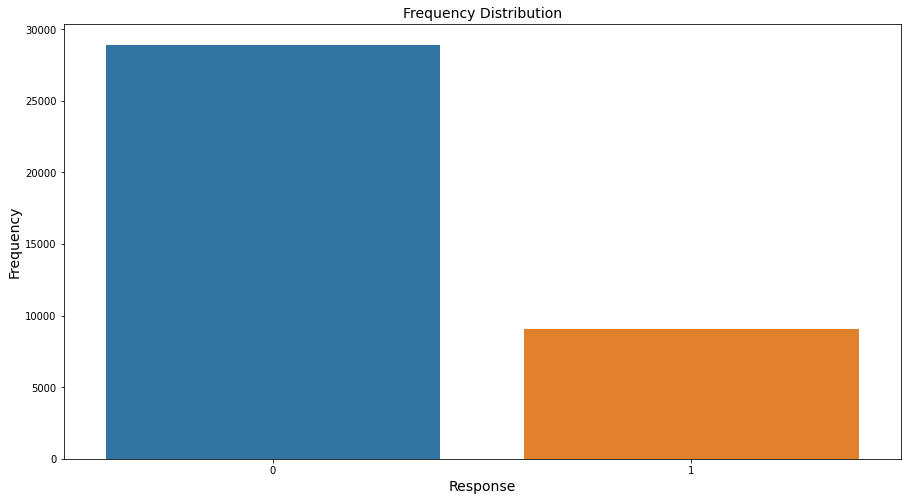

In [16]:
# setting a figure of size of 20 x 7 inches
fig = plt.figure(figsize = [15, 8])

sns.countplot(x = 'Response', data = health_train)

# Adding cosmetics to graph
plt.xlabel(xlabel = 'Response', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

# Display the plot
plt.show()

**Observation:**

- We can observe that there are lesser number of responses on recommended policy.
- This might pose a **big problem** while **performing model building**, but we **will see what we can do**.

**<h4>Question: Is there any association between Age and Survival?</h4>**


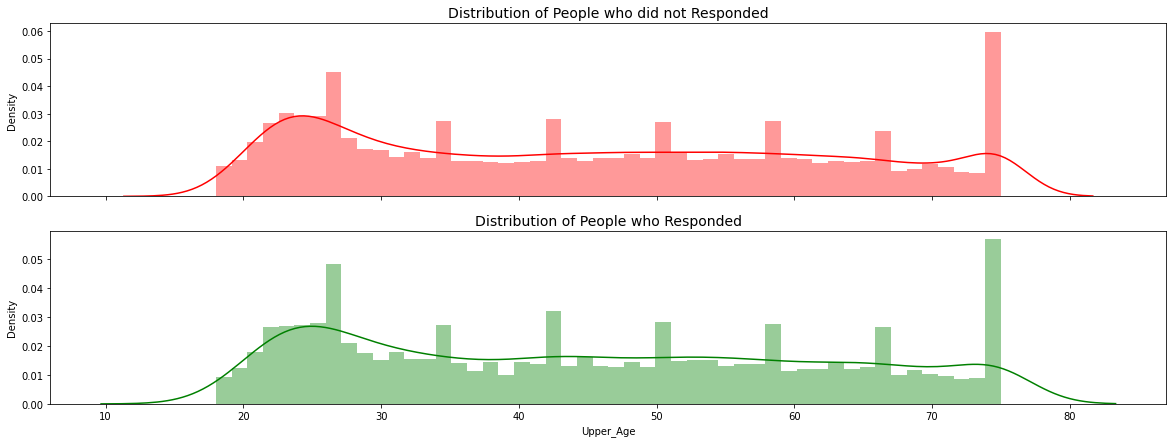

In [17]:
# Slicing data with non-resonse
Not_Response = health_train['Upper_Age'][health_train['Response'] == 0]

# Slicing data with response
Response = health_train['Upper_Age'][health_train['Response'] == 1]

# Plotting the distribution of the sliced data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 7))
sns.distplot(a = Not_Response, bins = 50, ax = ax1, color = 'red')
ax1.set_title(label = 'Distribution of People who did not Responded', size = 14)
ax1.set_xlabel(xlabel = '')
sns.distplot(a = Response, bins = 50, ax = ax2, color = 'green')
ax2.set_title(label = 'Distribution of People who Responded', size = 14)
plt.show()

**Observation:**

- We can see that the distribution of both the cases are similar.

**<h4>Question: Is there any relation between Response and Accomodation_Type?</h4>**

In [18]:
Not_Responded = health_train['Accomodation_Type'][health_train['Response'] == 0]
Not_Responded.value_counts()

Owned     15787
Rented    13145
Name: Accomodation_Type, dtype: int64

In [19]:
Responded = health_train['Accomodation_Type'][health_train['Response'] == 1]
Responded.value_counts()

Owned     4999
Rented    4069
Name: Accomodation_Type, dtype: int64

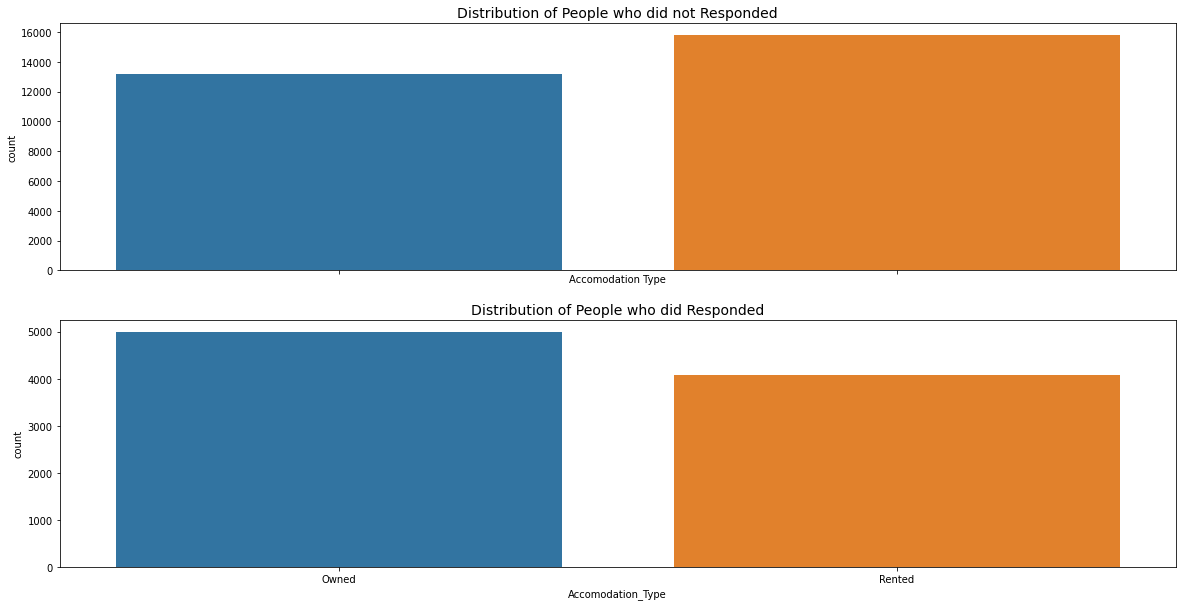

In [20]:
# Slicing data with non-responded
Not_Respond = health_train['Accomodation_Type'][health_train['Response'] == 0]

# Slicing data with responded
Respond = health_train['Accomodation_Type'][health_train['Response'] == 1]

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 10))
sns.countplot(Not_Respond,ax=ax1)
ax1.set_title(label = 'Distribution of People who did not Responded', size = 14)
ax1.set_xlabel(xlabel = 'Accomodation Type')
sns.countplot( Respond,ax=ax2)
ax2.set_title(label = 'Distribution of People who did Responded', size = 14)
plt.show()

**Observation:**

- We can **observe** most Owner has been responded and non-responded category as compare to rented type.

**<h4>Question: Is there any relation between Reco_Policy_Premium and Reco_Insurance_TypeReco_Policy_Premium?</h4>**

In [21]:
health_train[['Reco_Policy_Premium','Reco_Insurance_Type']].groupby(by = 'Reco_Insurance_Type').describe()

Reco_Policy_Premium                                     \
                                  count          mean          std     min   
Reco_Insurance_Type                                                          
Individual                      30214.0  12175.443238  4852.368884  2280.0   
Joint                            7786.0  21967.673953  6708.329567  3762.0   

                                                         
                         25%      50%      75%      max  
Reco_Insurance_Type                                      
Individual            8428.0  11682.0  15678.0  29488.0  
Joint                17136.0  22104.0  26747.4  43350.4

**Observation:**

- We can **observe** that individual policy holder is higher than joint policy holder but joint holder paying highest premium as compare to individual.

**<h4>Question: Is there any outlier in policy data?</h4>**

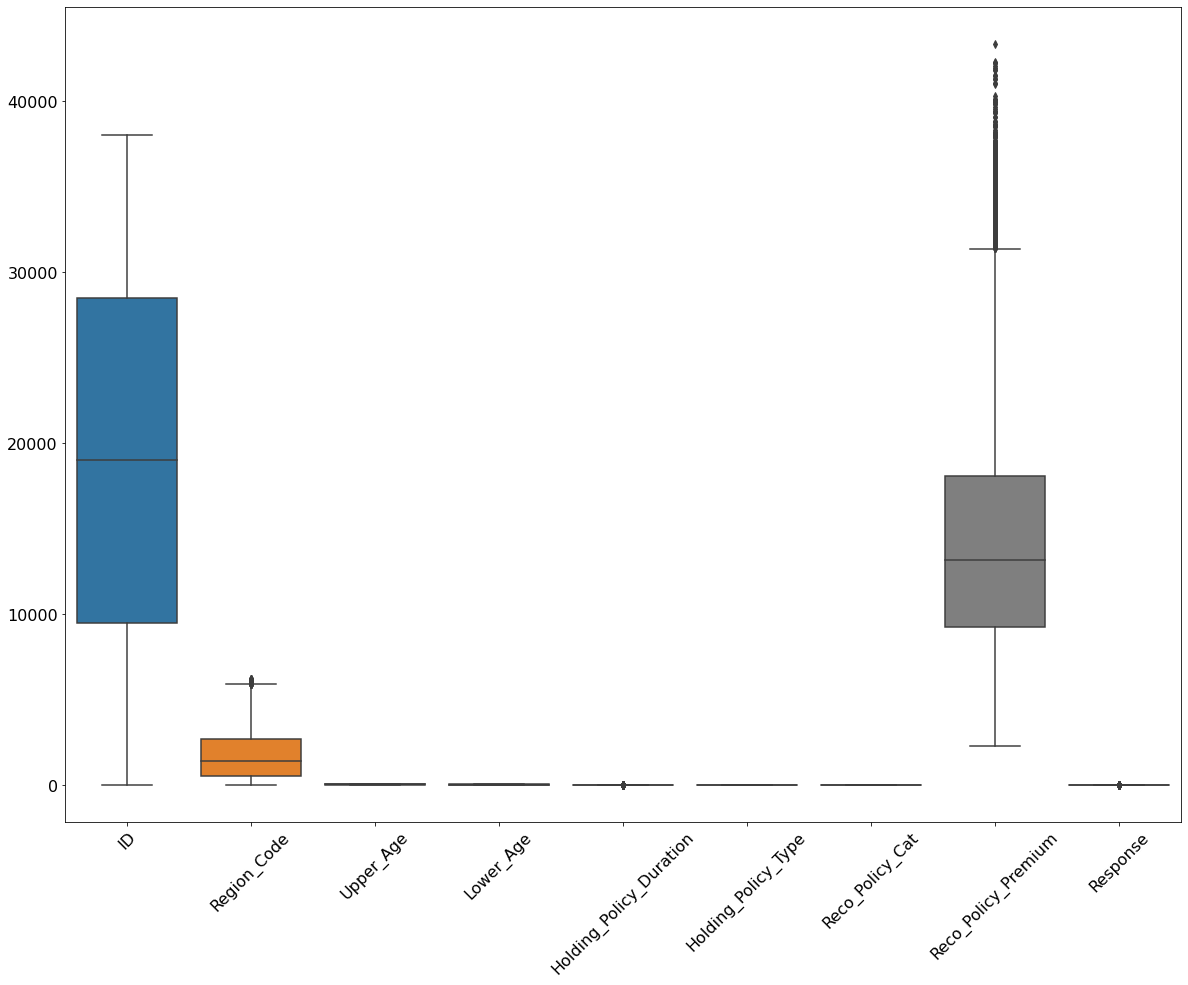

In [22]:
plt.figure(figsize=(20,15))

sns.boxplot(data=health_train)

plt.xticks(fontsize=16 ,rotation=45)
plt.yticks(fontsize=16)

plt.show()

<a name = Section7></a>

---
# **7. Post Data Processing & Feature Selection**
---
- Now we will **perform encoding of the categorical columns** and **feed it** to the **LogisticRegression**.

<a name = Section71></a>
### **7.1 Feature Selection**

- we will **visualize  the correlation** of input features **using Heatmap**.


Text(0.5, 1.0, 'Correlation between features')

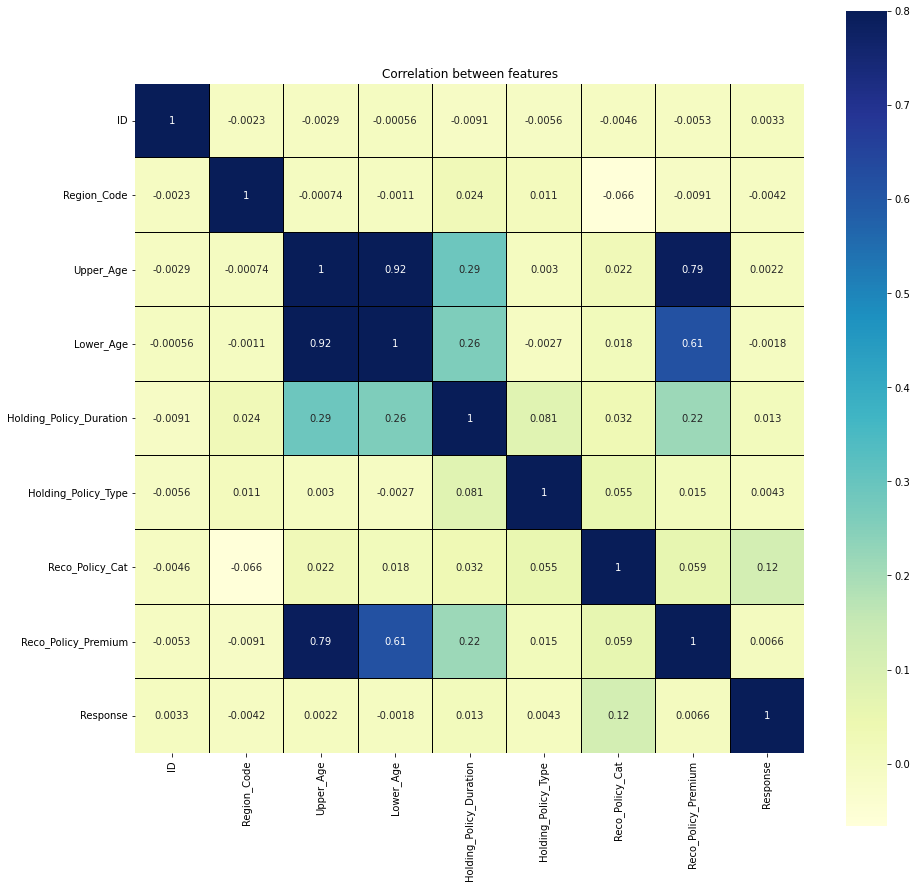

In [23]:
corr = health_train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

**Observation:** 

- __Region_Code__ is negatively corelated with __Response.__
- __Reco_Policy_Cat__ are highly positively corelated with __Response.__
- __Holding_Policy_duration__, __Upper_Age__ and __Reco_Policy_Premium__ as positiviely corelated with __Response.__

We will drop few features like `'ID', 'Region_Code', 'City_Code' and  'Lower_age'.

In [24]:
health_train_df = health_train.drop(['ID','Region_Code','City_Code','Lower_Age'], axis = 1)
health_train_df.head()

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,Rented,Individual,36,No,X1,14.0,3.0,22,11628.0,0
1,Owned,Joint,75,No,X2,5.0,3.0,22,30510.0,0
2,Owned,Individual,32,No,X1,1.0,1.0,19,7450.0,1
3,Owned,Joint,52,No,X1,14.0,3.0,19,17780.0,0
4,Rented,Individual,44,No,X2,3.0,1.0,16,10404.0,0


In [25]:
health_test_df = health_test.drop(['ID','Region_Code','City_Code','Lower_Age'], axis = 1)
health_test_df.head()

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,Rented,Joint,65,No,X4,5.0,3.0,19,30768.0
1,Owned,Individual,39,No,X4,4.0,2.0,16,13618.0
2,Owned,Individual,33,No,X4,1.0,2.0,3,6740.0
3,Owned,Joint,28,Yes,X1,5.0,3.0,8,9135.0
4,Owned,Individual,43,No,X2,5.0,4.0,18,12760.0


<a name = Section72></a>
### **7.2 Post-Profiling Report**

- After doing **dropping missing value**, **Removing unwanted features** we will now look at the report again.

In [ ]:
profile = ProfileReport(df = health_train_df)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')


Accomplished!


In [ ]:
from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observation:**


- For full details after the data processing checkout the report.

<a name = Section73></a>
### **7.3 Encoding Categorical Features**

In [26]:
health_train_df.dtypes #Checking for data types of features

Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration    float64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [27]:
#Seperating Categorical and Continuos features from train data
train_cat =health_train_df[['Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator']]
train_cont= health_train_df.drop(['Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator'], axis=1)

In [28]:
#Seperating Categorical and Continuos features from test data
test_cat =health_test_df[['Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator']]
test_cont= health_test_df.drop(['Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator'], axis=1)

In [29]:
from sklearn.preprocessing import LabelEncoder
train_cat=train_cat.apply(LabelEncoder().fit_transform)
test_cat=test_cat.apply(LabelEncoder().fit_transform)

In [30]:
train_final= pd.concat([train_cont, train_cat], axis = 1)
train_final.head()

,Upper_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator
0,36,14.0,3.0,22,11628.0,0,1,0,0,0
1,75,5.0,3.0,22,30510.0,0,0,1,0,1
2,32,1.0,1.0,19,7450.0,1,0,0,0,0
3,52,14.0,3.0,19,17780.0,0,0,1,0,0
4,44,3.0,1.0,16,10404.0,0,1,0,0,1


In [31]:
test_final= pd.concat([test_cont, test_cat], axis = 1)
test_final.head()

,Upper_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator
0,65,5.0,3.0,19,30768.0,1,1,0,3
1,39,4.0,2.0,16,13618.0,0,0,0,3
2,33,1.0,2.0,3,6740.0,0,0,0,3
3,28,5.0,3.0,8,9135.0,0,1,1,0
4,43,5.0,4.0,18,12760.0,0,0,0,1


In [32]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Upper_Age                38000 non-null  int64  
 1   Holding_Policy_Duration  38000 non-null  float64
 2   Holding_Policy_Type      38000 non-null  float64
 3   Reco_Policy_Cat          38000 non-null  int64  
 4   Reco_Policy_Premium      38000 non-null  float64
 5   Response                 38000 non-null  int64  
 6   Accomodation_Type        38000 non-null  int64  
 7   Reco_Insurance_Type      38000 non-null  int64  
 8   Is_Spouse                38000 non-null  int64  
 9   Health Indicator         38000 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 2.9 MB


In [33]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12882 entries, 0 to 12881
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Upper_Age                12882 non-null  int64  
 1   Holding_Policy_Duration  12882 non-null  float64
 2   Holding_Policy_Type      12882 non-null  float64
 3   Reco_Policy_Cat          12882 non-null  int64  
 4   Reco_Policy_Premium      12882 non-null  float64
 5   Accomodation_Type        12882 non-null  int64  
 6   Reco_Insurance_Type      12882 non-null  int64  
 7   Is_Spouse                12882 non-null  int64  
 8   Health Indicator         12882 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 905.9 KB


In [34]:
print(train_final.shape)
print(test_final.shape)

(38000, 10)
(12882, 9)


<a name = Section74></a>
### **7.4 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [35]:
X = train_final.drop('Response',axis = 1)
y = train_final['Response']

In [36]:
# split  data into training and testing sets of 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [37]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (30400, 9) (30400,)
Testing Data Shape: (7600, 9) (7600,)


In [ ]:
y_test.value_counts()

0    5786
1    1814
Name: Response, dtype: int64

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop Logistic Regression using input features** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **Accuracy**, also we will check for **Precision**, **Recall**, **F1-Score**, and **Precision-Recall Score**.



<a name = Section81></a>

## **8.1 Logistic Regression - Baseline Model**

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

## **Decision Tree - Baseline Model**

In [39]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

<a name = Section82></a>

## **8.2 Using Trained Model for Prediction**

In [40]:
preds_train = logreg.predict(X_train)
preds_test = logreg.predict(X_test)

In [41]:
preds_dt_train = dt.predict(X_train)
preds_dt_test = dt.predict(X_test)

<a name = Section83></a>

## **8.3 Logistic Regression / Decision Tree Model Evaluation**

In [42]:
def model_eval(actual, predicted):
  confuison_mat = confusion_matrix(actual, predicted)
  accuracy_scores = accuracy_score(actual, predicted)
  classi_report = classification_report(actual, predicted)
  print(confuison_mat)
  print(accuracy_scores)
  print(classi_report)

In [43]:
#Logistic Model Evaluation on train data
model_eval(y_train, preds_train)

[[23146     0]
 [ 7254     0]]
0.7613815789473685
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     23146
           1       0.00      0.00      0.00      7254

    accuracy                           0.76     30400
   macro avg       0.38      0.50      0.43     30400
weighted avg       0.58      0.76      0.66     30400



In [44]:
#Logistic Model Evaluation on train data
model_eval(y_test, preds_test)

[[5786    0]
 [1814    0]]
0.7613157894736842
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      5786
           1       0.00      0.00      0.00      1814

    accuracy                           0.76      7600
   macro avg       0.38      0.50      0.43      7600
weighted avg       0.58      0.76      0.66      7600



In [45]:
#Decision Tree Model Evaluation on train data
model_eval(y_train, preds_dt_train)

[[23146     0]
 [   19  7235]]
0.999375
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23146
           1       1.00      1.00      1.00      7254

    accuracy                           1.00     30400
   macro avg       1.00      1.00      1.00     30400
weighted avg       1.00      1.00      1.00     30400



In [46]:
#Decision Tree Model Evaluation on test data
model_eval(y_test, preds_dt_test)

[[4426 1360]
 [1245  569]]
0.6572368421052631
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      5786
           1       0.29      0.31      0.30      1814

    accuracy                           0.66      7600
   macro avg       0.54      0.54      0.54      7600
weighted avg       0.66      0.66      0.66      7600



Observation: Decision tree is better model than Logistic Regression model. so we will use the same for final submission on unseen test data.

In [47]:
y_pred_final = dt.predict(test_final)

In [62]:
submission = pd.DataFrame({'ID': test_original['ID'], 'Response': y_pred_final})
submission.to_csv('HI_submission.csv', index=False, header=None)

In [63]:
submission.head()
# print(submission.Response.value_counts())

,ID,Response
0,38001,0
1,38002,0
2,38003,1
3,38004,0
4,38005,0


<a name = Section9></a>

---
# **9. Conclusion**
---

- This Health Insurance Lead Prediciton had only 9068 person responded out of 38000 records so it is clearly inbalanced dataset so Decision tree is better model than Logistic Regression model. so we will use the same for final submission on unseen test data.

